# Prediction of CKD in Patients Using Their Medical Data

## Preamble

**Objective of this project**
We wish to create a binary classification ML model in an attempt to predict whether a patient has CKD or not, given some of their medical data.


**Data Set Citations**
The data set was procured from the well-known UCI ML Repository. Here is the citation to the repository:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Here is the citation to the data set:

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease


**Performance Metric Used**
We use ... as the main performance metric.


**Subject-Matter Knowledge**
We performed research from various medical resources, namely research articles, to learn about the medical terminology,..... Please refer to the references in the documentation on GitHub.


**Assumptions**
We make the following assumptions in this project:
1. asdf
2. asdf

## Project Setup

**Standard Imports**

In [1]:
import arff  # Needed for importing dataset.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

**Function for saving diagrams, plots, graphs, etc.**

In [2]:
ROOT_DIRECTORY = "."
IMAGES_PATH = os.path.join(ROOT_DIRECTORY, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(filename, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, filename + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**Jupyter Notebook Configurations**

In [3]:
plt.rcParams["figure.dpi"] = 150

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# To make all heatmaps lower triangular matrices.

def heatmap(data, **kwargs):

    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data, mask=mask, **kwargs)

## Import Data

**Importing Data Set**

In [6]:
FILE_PATH = r".\data\chronic_kidney_disease_full.arff"

In [7]:
dataset = arff.load(fp=open(FILE_PATH, mode="r"))

In [8]:
# pprint(dataset)

In [9]:
# print(dataset['description'])

**Converting to Pandas Dataframe**

In [10]:
data = np.array(dataset["data"])
data

array([[48.0, 80.0, '1.020', ..., 'no', 'no', 'ckd'],
       [7.0, 50.0, '1.020', ..., 'no', 'no', 'ckd'],
       [62.0, 80.0, '1.010', ..., 'no', 'yes', 'ckd'],
       ...,
       [12.0, 80.0, '1.020', ..., 'no', 'no', 'notckd'],
       [17.0, 60.0, '1.025', ..., 'no', 'no', 'notckd'],
       [58.0, 80.0, '1.025', ..., 'no', 'no', 'notckd']], dtype=object)

In [11]:
HEADERS = np.array(list(zip(*dataset["attributes"]))[0])
HEADERS

array(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'class'], dtype='<U5')

In [12]:
TYPE_NAMES = np.array(list(zip(*dataset["attributes"]))[1])
# TYPE_NAMES
# print(*zip(HEADERS,TYPE_NAMES), sep='\n')

TYPE_DICT = {name:typ for name,typ in zip(HEADERS,TYPE_NAMES)}
TYPE_DICT

# hello = pd.DataFrame(TYPE_DICT)

{'age': 'NUMERIC',
 'bp': 'NUMERIC',
 'sg': ['1.005', '1.010', '1.015', '1.020', '1.025'],
 'al': ['0', '1', '2', '3', '4', '5'],
 'su': ['0', '1', '2', '3', '4', '5'],
 'rbc': ['normal', 'abnormal'],
 'pc': ['normal', 'abnormal'],
 'pcc': ['present', 'notpresent'],
 'ba': ['present', 'notpresent'],
 'bgr': 'NUMERIC',
 'bu': 'NUMERIC',
 'sc': 'NUMERIC',
 'sod': 'NUMERIC',
 'pot': 'NUMERIC',
 'hemo': 'NUMERIC',
 'pcv': 'NUMERIC',
 'wbcc': 'NUMERIC',
 'rbcc': 'NUMERIC',
 'htn': ['yes', 'no'],
 'dm': ['yes', 'no'],
 'cad': ['yes', 'no'],
 'appet': ['good', 'poor'],
 'pe': ['yes', 'no'],
 'ane': ['yes', 'no'],
 'class': ['ckd', 'notckd']}

In [13]:
# Changing the 'TYPES' list into pandas types, manually by observation

TYPES = [int, int, float, int, int,            # Age, BP, SG, AL, SU
         bool, bool, bool, bool, int,          # RBC, PC, PCC, BA, BGR
         int, float, int, float, float,        # BU, SC, SOD, POT, HEMO
         int, int, float, bool, bool,          # PCV, WBCC, RBCC, HTN, DM
         bool, bool, bool, bool, bool]         # CAD, APPET, PE, ANE, CLASS

# Need to use 'float' type for integer data, b/c nan is a float
# Will convert object type into boolean later
TYPES2 = [float, float, float, float, float,              # Age, BP, SG, AL, SU
         object, object, object, object, float,           # RBC, PC, PCC, BA, BGR
         float, float, float, float, float,               # BU, SC, SOD, POT, HEMO
         float, float, float, object, object,             # PCV, WBCC, RBCC, HTN, DM
         object, object, object, object, object]          # CAD, APPET, PE, ANE, CLASS

TYPE_MAPPINGS = {header:typ for header, typ in zip(HEADERS,TYPES2)}
#TYPE_MAPPINGS

**Final Imported Data**

In [51]:
ckd_data = pd.DataFrame(data=data, columns=HEADERS)
ckd_data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,None,normal,notpresent,notpresent,121,36,1.2,None,None,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,None,normal,notpresent,notpresent,None,18,0.8,None,None,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,None,None,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,None,None,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,None,None,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,None,normal,notpresent,notpresent,100,54,24,104,4,12.4,36,None,None,no,no,no,good,no,no,ckd
7,24,None,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,None,None,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,None,None,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## Split Data

(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

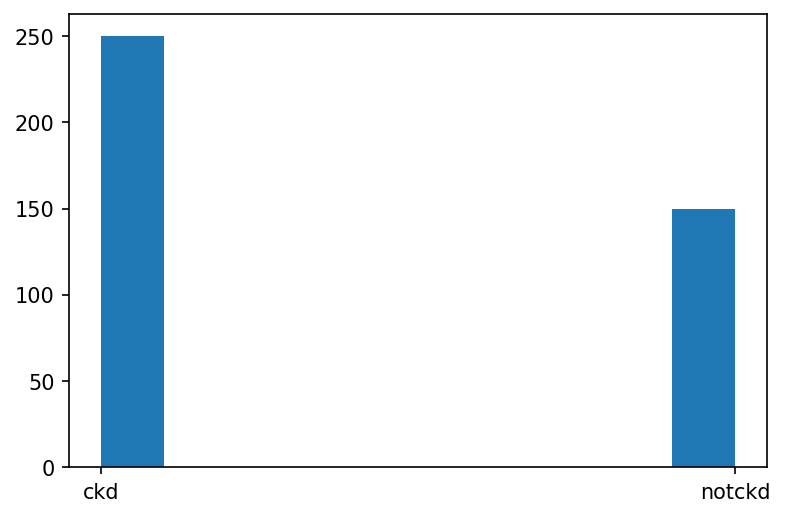

In [15]:
plt.hist(ckd_data["class"])

In [16]:
ckd_data["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

The ratio of positive to negative classes is:

positive -> 250/250+150 = 250/400 -> 62.5 %

negative -> 150/250+150 = 150/400 -> 37.5 %

We will split our dataset into test/train according to these ratios, with the test set being 20% overall size.

In [114]:
from sklearn.model_selection import train_test_split

X = ckd_data.drop("class", axis=1)
y = ckd_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [18]:
y_train.value_counts()

ckd       200
notckd    120
Name: class, dtype: int64

In [19]:
y_test.value_counts()

ckd       50
notckd    30
Name: class, dtype: int64

Indeed, our training and test sets have the desired ratios:

TRAINING

positive: 200/(200+120) = 200/320 -> 62.5%
negative: 120/(200+120) = 120/320 -> 37.5%

TESTING

same

In [148]:
ckd_training = pd.concat(objs=[X_train,y_train], axis=1).reset_index(drop=True)
ckd_training.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,59,60,1.020,0,0,normal,normal,notpresent,notpresent,113,23,1.1,139,3.5,15.3,54,6500,4.9,no,no,no,good,no,no,notckd
1,76,70,1.015,3,4,normal,abnormal,present,notpresent,None,164,9.7,131,4.4,10.2,30,11300,3.4,yes,yes,yes,poor,yes,no,ckd
2,70,90,1.015,0,0,None,normal,notpresent,notpresent,144,125,4,136,4.6,12,37,8200,4.5,yes,yes,no,poor,yes,no,ckd
3,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,50,0.5,145,5,17.6,51,6500,5,no,no,no,good,no,no,notckd
4,23,80,1.020,0,0,normal,normal,notpresent,notpresent,99,46,1.2,142,4,17.7,46,4300,5.5,no,no,no,good,no,no,notckd
5,43,60,1.025,0,0,normal,normal,notpresent,notpresent,108,25,1,144,5,17.8,43,7200,5.5,no,no,no,good,no,no,notckd
6,51,80,1.020,0,0,normal,normal,notpresent,notpresent,94,15,1.2,144,3.7,15.5,46,9500,6.4,no,no,no,good,no,no,notckd
7,50,None,None,None,None,normal,None,notpresent,notpresent,219,176,13.8,136,4.5,8.6,24,13200,2.7,yes,no,no,good,yes,yes,ckd
8,24,70,1.025,0,0,normal,normal,notpresent,notpresent,140,23,0.6,140,4.7,16.3,48,5800,5.6,no,no,no,good,no,no,notckd
9,71,60,1.015,4,0,normal,normal,notpresent,notpresent,118,125,5.3,136,4.9,11.4,35,15200,4.3,yes,yes,no,poor,yes,no,ckd


In [150]:
ckd_testing = pd.concat(objs=[X_test,y_test], axis=1).reset_index(drop=True)
ckd_testing.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,81,60,None,None,None,None,None,notpresent,notpresent,148,39,2.1,147,4.2,10.9,35,9400,2.4,yes,yes,yes,poor,yes,no,ckd
1,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
2,57,80,1.020,0,0,normal,normal,notpresent,notpresent,133,48,1.2,147,4.3,14.8,46,6600,5.5,no,no,no,good,no,no,notckd
3,55,70,1.020,0,0,normal,normal,notpresent,notpresent,107,26,1.1,None,None,17,50,6700,6.1,no,no,no,good,no,no,notckd
4,25,70,1.020,0,0,normal,normal,notpresent,notpresent,88,42,0.5,136,3.5,13.3,48,7000,4.9,no,no,no,good,no,no,notckd


## EDA

- Need to change Dtypes
- Only do this with the X_train, y_train splits.
- Look for correlations
- investigate correlations of each attribute with the target
- think of what transformations you would need to apply (actually apply in data cleaning step)
- think of good new features to create
- consider using scatter_matrix
- consider attribute combinations
- investigate missing values
- investigate presence of outliers
- distributions of various attributes

- based on your table of explanations of the attributes, you can look into what appear to be the more contributing factors to classifying CKD (compare your research with what the data/graphs will show)

In [151]:
ckd = ckd_training.copy()
ckd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,59,60,1.020,0,0,normal,normal,notpresent,notpresent,113,23,1.1,139,3.5,15.3,54,6500,4.9,no,no,no,good,no,no,notckd
1,76,70,1.015,3,4,normal,abnormal,present,notpresent,None,164,9.7,131,4.4,10.2,30,11300,3.4,yes,yes,yes,poor,yes,no,ckd
2,70,90,1.015,0,0,None,normal,notpresent,notpresent,144,125,4,136,4.6,12,37,8200,4.5,yes,yes,no,poor,yes,no,ckd
3,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,50,0.5,145,5,17.6,51,6500,5,no,no,no,good,no,no,notckd
4,23,80,1.020,0,0,normal,normal,notpresent,notpresent,99,46,1.2,142,4,17.7,46,4300,5.5,no,no,no,good,no,no,notckd
5,43,60,1.025,0,0,normal,normal,notpresent,notpresent,108,25,1,144,5,17.8,43,7200,5.5,no,no,no,good,no,no,notckd
6,51,80,1.020,0,0,normal,normal,notpresent,notpresent,94,15,1.2,144,3.7,15.5,46,9500,6.4,no,no,no,good,no,no,notckd
7,50,None,None,None,None,normal,None,notpresent,notpresent,219,176,13.8,136,4.5,8.6,24,13200,2.7,yes,no,no,good,yes,yes,ckd
8,24,70,1.025,0,0,normal,normal,notpresent,notpresent,140,23,0.6,140,4.7,16.3,48,5800,5.6,no,no,no,good,no,no,notckd
9,71,60,1.015,4,0,normal,normal,notpresent,notpresent,118,125,5.3,136,4.9,11.4,35,15200,4.3,yes,yes,no,poor,yes,no,ckd


In [152]:
ckd.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,315.0,310.0,287,286,284,193,271,316,316,282.0,303.0,303.0,248.0,248.0,276.0,259.0,231.0,212.0,320,320,320,319,319,319,320
unique,72.0,9.0,5,6,6,2,2,2,2,131.0,102.0,72.0,32.0,38.0,106.0,38.0,82.0,43.0,2,2,2,2,2,2,2
top,60.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,99.0,25.0,1.2,135.0,5.0,15.0,52.0,7200.0,5.2,no,no,no,good,no,no,ckd
freq,17.0,95.0,82,162,232,154,212,284,299,9.0,12.0,36.0,33.0,25.0,14.0,19.0,8.0,15.0,209,215,298,253,259,277,200


In [57]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 380 to 8
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     315 non-null    object
 1   bp      310 non-null    object
 2   sg      287 non-null    object
 3   al      286 non-null    object
 4   su      284 non-null    object
 5   rbc     193 non-null    object
 6   pc      271 non-null    object
 7   pcc     316 non-null    object
 8   ba      316 non-null    object
 9   bgr     282 non-null    object
 10  bu      303 non-null    object
 11  sc      303 non-null    object
 12  sod     248 non-null    object
 13  pot     248 non-null    object
 14  hemo    276 non-null    object
 15  pcv     259 non-null    object
 16  wbcc    231 non-null    object
 17  rbcc    212 non-null    object
 18  htn     320 non-null    object
 19  dm      320 non-null    object
 20  cad     320 non-null    object
 21  appet   319 non-null    object
 22  pe      319 non-null    ob

In [58]:
# Changing numerical data to 'float64' type.
ckd = ckd.astype(dtype=TYPE_MAPPINGS)

In [59]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 380 to 8
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     315 non-null    float64
 1   bp      310 non-null    float64
 2   sg      287 non-null    float64
 3   al      286 non-null    float64
 4   su      284 non-null    float64
 5   rbc     193 non-null    object 
 6   pc      271 non-null    object 
 7   pcc     316 non-null    object 
 8   ba      316 non-null    object 
 9   bgr     282 non-null    float64
 10  bu      303 non-null    float64
 11  sc      303 non-null    float64
 12  sod     248 non-null    float64
 13  pot     248 non-null    float64
 14  hemo    276 non-null    float64
 15  pcv     259 non-null    float64
 16  wbcc    231 non-null    float64
 17  rbcc    212 non-null    float64
 18  htn     320 non-null    object 
 19  dm      320 non-null    object 
 20  cad     320 non-null    object 
 21  appet   319 non-null    object 
 22  pe

In [60]:
ckd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,315.000000,310.000000,287.000000,286.000000,284.000000,282.000000,303.000000,303.000000,248.000000,248.000000,276.000000,259.000000,231.000000,212.000000
mean,51.095238,76.322581,1.017491,0.996503,0.482394,149.343972,55.720132,2.904290,137.774194,4.655242,12.703261,39.416988,8345.021645,4.775943
std,16.881674,12.721531,0.005716,1.339018,1.141742,83.537058,48.740803,4.643882,7.221581,3.561861,2.859871,8.710006,2955.504647,1.004462
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,104.000000,2.500000,4.800000,14.000000,2200.000000,2.100000
25%,41.500000,70.000000,1.012500,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.800000,10.750000,33.000000,6500.000000,4.000000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,120.000000,41.000000,1.200000,138.000000,4.350000,12.950000,41.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,159.750000,60.500000,2.700000,142.000000,4.900000,15.000000,46.000000,9650.000000,5.500000
max,90.000000,140.000000,1.025000,5.000000,5.000000,490.000000,391.000000,48.100000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


**Investigating Null Values**

In [153]:
# How many null values for each attribute.

absolute = ckd.isnull().sum().sort_values(ascending=False)
percentage = round(ckd.isnull().sum() / 320 * 100, 2).sort_values(ascending=False)

ckd_null_attributes = pd.DataFrame(data={"Absolute": absolute, "Percentage": percentage})
ckd_null_attributes

,Absolute,Percentage
rbc,127,39.69
rbcc,108,33.75
wbcc,89,27.81
sod,72,22.50
pot,72,22.50
pcv,61,19.06
pc,49,15.31
hemo,44,13.75
bgr,38,11.88
su,36,11.25


In [62]:
# How many null values per each instance.

ckd_null_instances = pd.DataFrame(data=ckd.isnull().sum(axis=1), columns=["Num_Null"]).transpose()
ckd_null_instances

,380,56,126,371,333,347,388,132,279,127,183,161,22,334,275,46,244,314,204,139,136,168,299,227,93,382,109,79,373,147,84,19,13,254,205,335,45,72,199,171,193,328,284,0,215,381,124,340,53,200,182,386,131,223,138,170,290,67,240,173,118,391,15,122,329,255,43,110,399,140,115,33,352,364,232,181,128,292,66,178,117,366,29,97,302,295,206,158,24,396,271,113,312,123,95,17,393,31,7,359,233,269,201,234,323,301,222,277,73,190,325,261,155,368,220,70,196,133,283,367,167,55,38,162,27,159,342,350,197,294,165,349,228,11,300,96,78,385,217,379,248,176,153,320,266,308,298,26,186,225,330,10,9,263,332,265,327,177,337,341,241,394,156,345,194,120,318,343,280,236,164,306,18,64,252,344,111,212,49,305,372,363,293,247,94,316,23,237,243,370,198,76,137,209,134,374,35,184,148,5,25,61,16,42,360,144,30,185,108,75,145,358,125,245,216,322,105,80,354,39,376,270,47,163,32,44,231,398,81,98,315,6,86,68,224,60,253,357,276,83,257,4,259,389,219,383,326,272,104,307,114,397,289,311,141,101,180,319,264,296,28,317,267,262,91,65,351,40,82,281,172,59,89,390,336,213,69,77,175,218,304,142,150,346,36,195,355,2,250,338,12,313,100,135,226,211,41,90,356,62,146,278,166,143,112,152,229,238,375,51,119,268,3,34,310,154,274,192,85,8
Num_Null,0,1,1,0,0,0,0,5,0,0,5,7,0,2,0,1,1,0,2,4,6,4,0,3,0,0,10,3,0,0,0,3,8,0,9,0,4,7,1,0,1,3,0,3,10,2,3,0,4,1,3,0,5,1,7,1,4,8,3,1,6,0,1,9,0,0,1,1,0,5,4,4,0,0,9,0,0,0,4,1,3,0,5,1,2,5,3,2,1,0,0,9,3,5,5,8,0,1,3,0,4,0,7,3,0,0,11,0,2,0,0,0,3,0,6,1,0,0,5,0,3,7,4,6,0,0,0,2,7,3,11,2,11,0,2,5,7,0,1,0,0,0,0,0,0,0,0,1,5,0,3,5,0,0,1,0,0,4,0,0,1,0,7,0,9,4,0,0,5,7,3,0,1,8,0,0,1,0,2,0,0,2,1,4,1,3,10,4,1,0,0,0,1,8,4,0,2,1,11,2,1,4,4,1,0,0,10,4,1,6,1,0,9,5,6,5,1,1,0,1,0,0,5,1,1,2,7,0,5,5,5,3,11,5,5,5,0,0,3,4,0,2,0,0,3,0,0,0,11,0,5,0,0,0,2,1,4,4,0,0,9,0,0,0,0,6,0,2,9,0,2,11,5,0,2,0,3,1,3,4,0,9,3,3,2,3,0,3,0,0,1,0,4,3,0,7,8,0,0,1,4,0,9,4,6,3,0,7,0,3,7,6,0,7,0,1,2,7,9,2


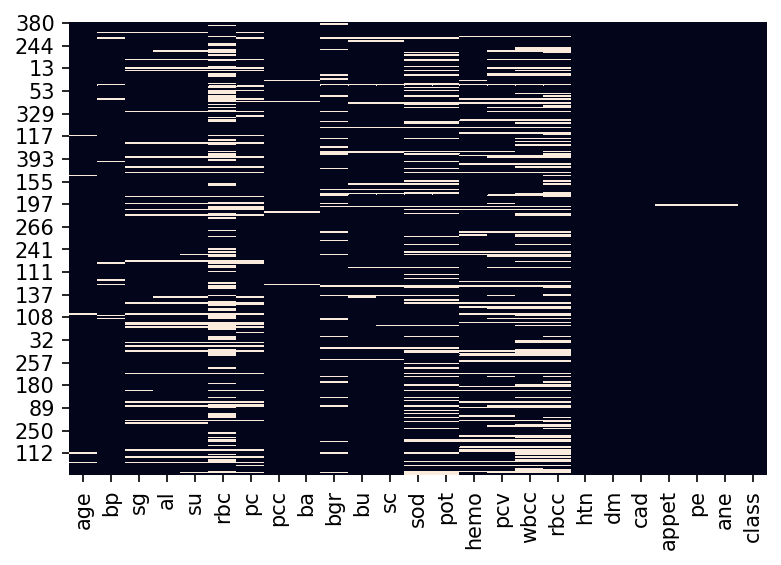

In [63]:
# The while lines in the plot below are the null values.

sns.heatmap(ckd.isnull(), cbar=False)#, linewidths=0.01)

**Investigating Correlations Among Attributes**

To do investigations without changing the null values first, we do one-hot encoding. SKL's OneHotEncoder class can't handle NoneType, so we do OHE manually.

In [161]:
# Doing one-hot encoding for the (binary) categorical variables

ckd_ohe = pd.DataFrame()
atts_dict = dict(dataset['attributes'])

for col in ckd.select_dtypes(include=['object']).columns:
    
    new_values = []
    positive, negative = atts_dict[col]
    
    for item in ckd[col]:
        if item == positive:
            new_values.append(1)
        elif item == negative:
            new_values.append(0)
        else:
            new_values.append(item)

    ckd_ohe[col+"_"+positive] = pd.Series(data=new_values, dtype='float64')

    # Uncomment the two lines below to have the affects on the original ckd dataframe.

    ckd[col+"_"+positive] = pd.Series(data=new_values, dtype='float64')
    ckd.drop(col, axis=1, inplace=True)

In [162]:
ckd.head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_good,pe_yes,ane_yes,class_ckd
0,59.0,60.0,1.020,0.0,0.0,113.0,23.0,1.1,139.0,3.5,15.3,54.0,6500.0,4.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,76.0,70.0,1.015,3.0,4.0,NaN,164.0,9.7,131.0,4.4,10.2,30.0,11300.0,3.4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,70.0,90.0,1.015,0.0,0.0,144.0,125.0,4.0,136.0,4.6,12.0,37.0,8200.0,4.5,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,28.0,60.0,1.025,0.0,0.0,79.0,50.0,0.5,145.0,5.0,17.6,51.0,6500.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23.0,80.0,1.020,0.0,0.0,99.0,46.0,1.2,142.0,4.0,17.7,46.0,4300.0,5.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200.0,5.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,51.0,80.0,1.020,0.0,0.0,94.0,15.0,1.2,144.0,3.7,15.5,46.0,9500.0,6.4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,50.0,NaN,NaN,NaN,NaN,219.0,176.0,13.8,136.0,4.5,8.6,24.0,13200.0,2.7,1.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
8,24.0,70.0,1.025,0.0,0.0,140.0,23.0,0.6,140.0,4.7,16.3,48.0,5800.0,5.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,71.0,60.0,1.015,4.0,0.0,118.0,125.0,5.3,136.0,4.9,11.4,35.0,15200.0,4.3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


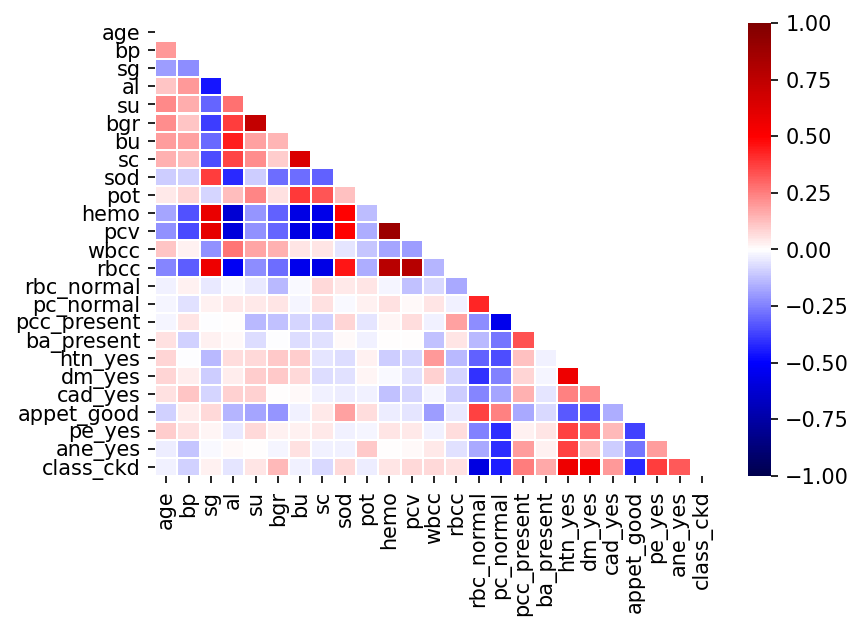

In [36]:
heatmap(ckd.corr(), cmap="seismic", yticklabels=True, linecolor="white", linewidths=.5, vmin=-1.0, vmax=1.0)

In [37]:
corr_matrix = ckd.corr()
corr_matrix["bp"].sort_values(ascending=False)

bp             1.000000
age            0.201062
al             0.196954
bu             0.183042
su             0.158480
sc             0.129904
cad_yes        0.116529
bgr            0.116329
pot            0.084999
pe_yes         0.055883
pcc_present    0.047950
appet_good     0.035393
dm_yes         0.033844
rbc_normal     0.025814
wbcc           0.024589
htn_yes       -0.006626
pc_normal     -0.058572
ba_present    -0.088747
class_ckd     -0.089015
sod           -0.089225
ane_yes       -0.111920
sg            -0.219884
rbcc          -0.312717
hemo          -0.340673
pcv           -0.356594
Name: bp, dtype: float64

In [38]:
# sns.pairplot(ckd)

In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
# sns.distplot(ckd[fields[0]])
# sns.distplot(ckd[fields[1]])
# sns.distplot(ckd[fields[2]])

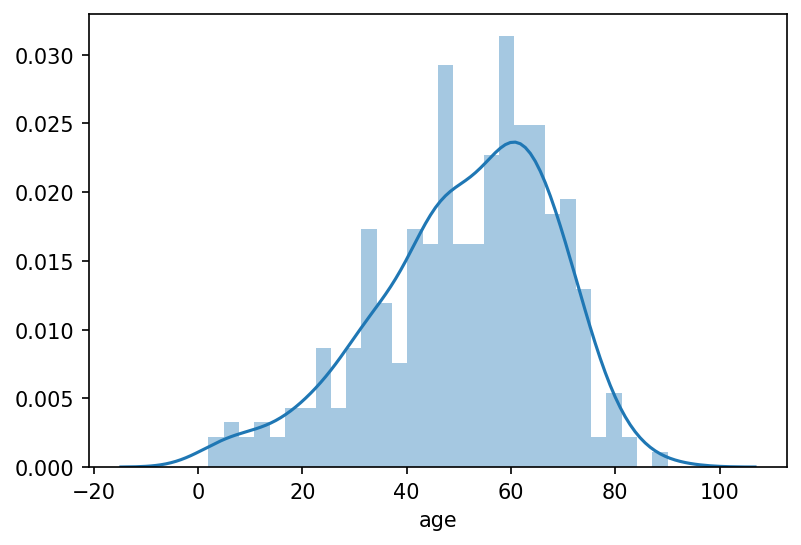

In [41]:
fields = ['age', 'bp', 'rbc_normal', 'bu', 'sc', 'sod']

# for field in fields:
#     sns.distplot(ckd[field])

sns.distplot(ckd[fields[0]], bins=30)


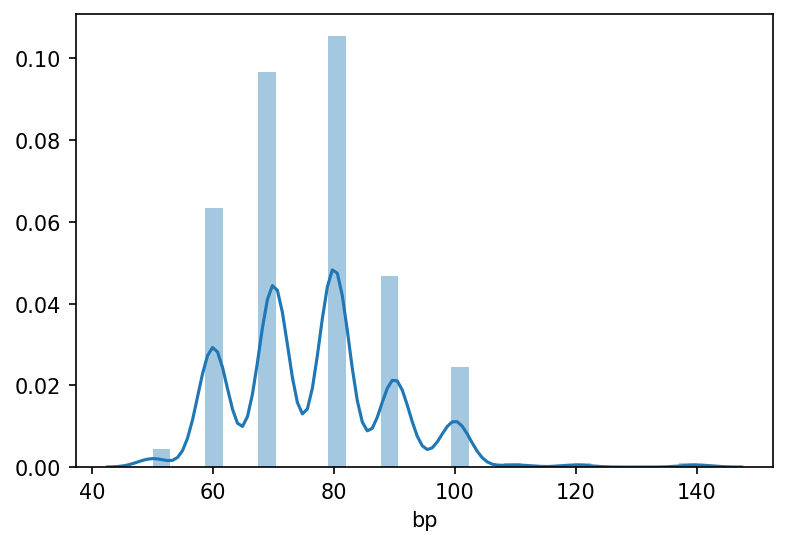

In [42]:
sns.distplot(ckd[fields[1]])


C:\Users\AJ\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


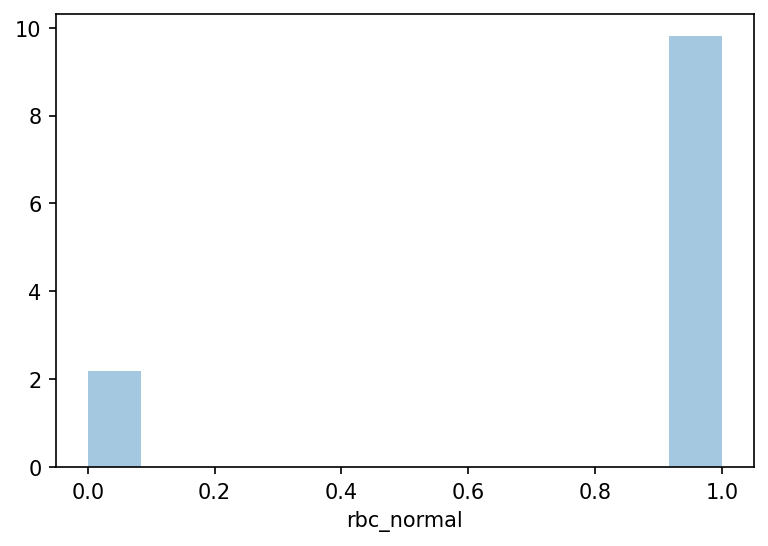

In [43]:
sns.distplot(ckd[fields[2]])

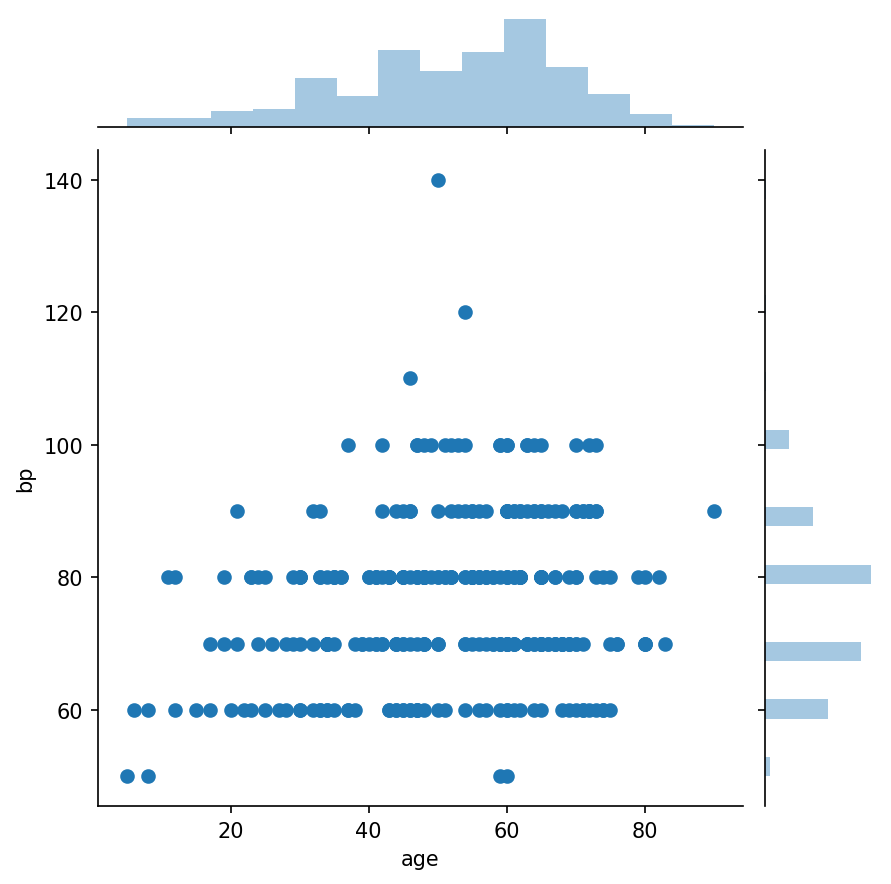

In [44]:
sns.jointplot(x="age", y="bp", data=ckd)

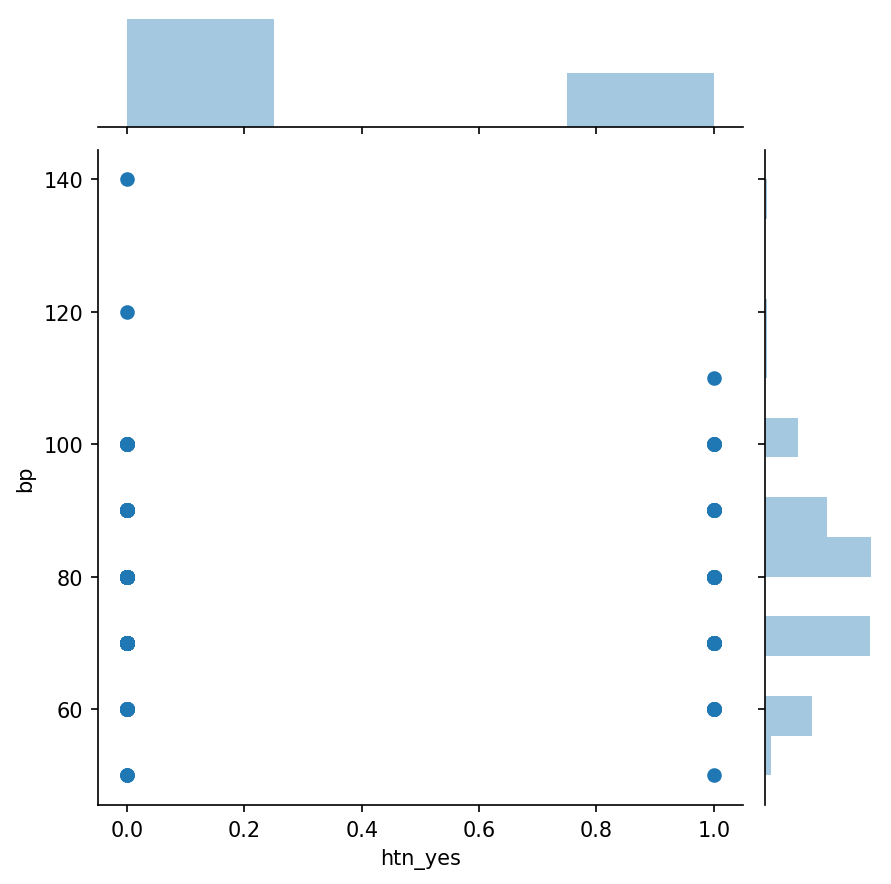

In [45]:
sns.jointplot(x="htn_yes", y="bp", data=ckd)

## Data Cleaning

- deal with null values (can impute with median?)
- one-hot encoding on categorical attributes
- conclude with custom transformation class & transformation pipeline for everything you did
- think about feature scaling
- do feature engineering
- write all code as functions
- deal with any outliers
- drop attributes that aren't useful
- apply transformations from EDA step
- consider feature scaling (normalize, standardization)

In [46]:
# Changing 'object' (i.e. string) dtypes to 'float64' (needed for one-hot encoding later).
# ckd = ckd.astype(dtype='category')

In [47]:
# ckd.info()

To help inform us on what to do will null values, we do a PCA to see which attributes explain the most variance.

In order to use SKL's PCA class, we must convert the categorical attributes to numerical format, and we do one-hot encoding to accomplish this.

In [48]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)
# ckd_2D = pca.fit_transform(ckd)

## Model Selection

- select a few models to try out (initially, don't go too in-depth with them)
- consider cross-validation for evaluation
- narrow down which models seem promising
- which overall metric to use for evaluation?
- analyze each model's errors -> can drop any less useful attributes/features
- use confusion matrix
- consider precision/recall trade-off (to determine correct decision threshold)
- can also look at ROC/AUC curves
- can consider using a confusion matrix to visualize errors
- do grid search on them
- visualize decision boundaries
- final model is ensemble of all others

Models to try:
- logistic regression
- naive Bayes?
- SVM (may be non-linear)
    - can look into polynomial kernel trick and/or similarity features
- decision tree (CART)
- bagging/pasting/boosting classifiers
- random forests (for feature importance!)
- look into PCA to determine appropriate number of dimensions to use (if necessary)

Short-list top 3-5 models.

## Fine-Tuning

- fine-tune hyperparameters using cross-validation
- treat data transformation choices as hyperparameters
    - especially when you're not sure about your choices (ex: drop missing values, or impute)
- if taking too long, can use random search (instead of grid search)
- create final model

## Evaluate Model on Test Set